In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('C:/Users/hello/Downloads/data/data/sierraleone-bumbuna.csv')
number_column= df.drop(['Timestamp', 'Comments'], axis=1)

medians= number_column.median()
means=number_column.mean()
stds= number_column.std()

print(f' mean: {means}')
print(f' Median: {medians}')
print(f' Standard deviation: {stds}')

 mean: GHI              201.957515
DNI              116.376337
DHI              113.720571
ModA             206.643095
ModB             198.114691
Tamb              26.319394
RH                79.448857
WS                 1.146113
WSgust             1.691606
WSstdev            0.363823
WD               133.044668
WDstdev            7.172220
BP               999.876469
Cleaning           0.000967
Precipitation      0.004806
TModA             32.504263
TModB             32.593091
dtype: float64
 Median: GHI                 0.3
DNI                -0.1
DHI                -0.1
ModA                3.6
ModB                3.4
Tamb               25.3
RH                 85.4
WS                  0.8
WSgust              1.6
WSstdev             0.4
WD                161.5
WDstdev             6.2
BP               1000.0
Cleaning            0.0
Precipitation       0.0
TModA              26.6
TModB              26.9
dtype: float64
 Standard deviation: GHI              298.495150
DNI              218.

In [2]:
missing_value= df.isnull().sum()
print(missing_value)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [3]:

negative_values = df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']] < 0
print(negative_values.sum())

GHI       261135
DNI       266352
DHI       263128
ModA           0
ModB           0
WS             0
WSgust         0
dtype: int64


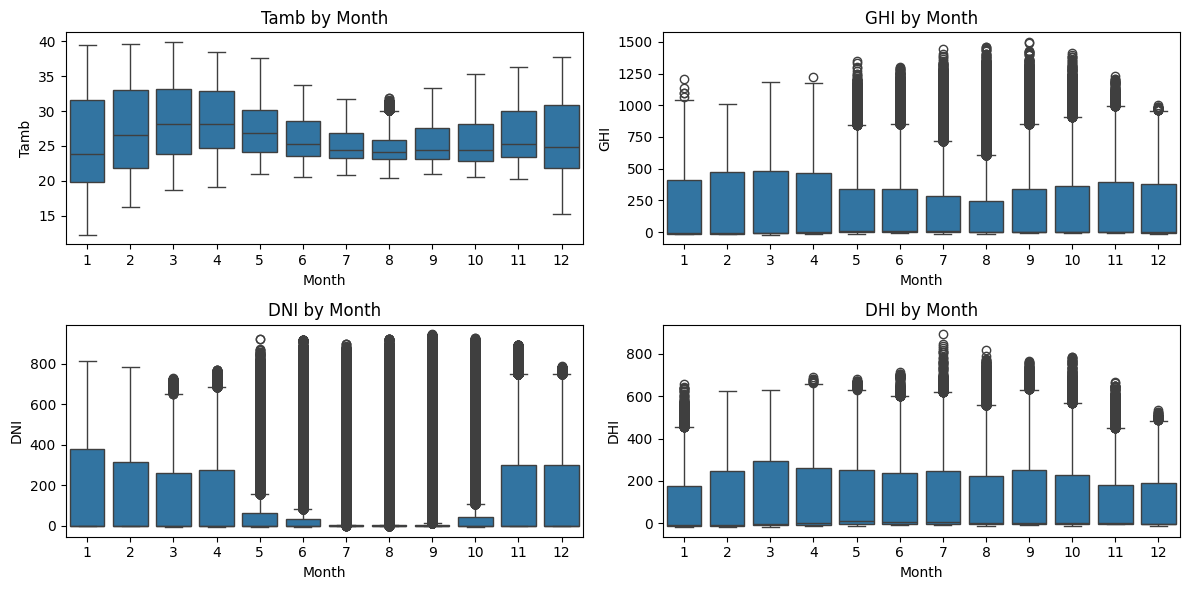

In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Extract month and hour for analysis
df['Month'] = df.index.month
df['Hour'] = df.index.hour

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.boxplot(x='Month', y='Tamb', data=df)
plt.title('Tamb by Month')

plt.subplot(2, 2, 2)
sns.boxplot(x='Month', y='GHI', data=df)
plt.title('GHI by Month')

plt.subplot(2, 2, 3)
sns.boxplot(x='Month', y='DNI', data=df)
plt.title('DNI by Month')

plt.subplot(2, 2, 4)
sns.boxplot(x='Month', y='DHI', data=df)
plt.title('DHI by Month')

plt.tight_layout()
plt.show()

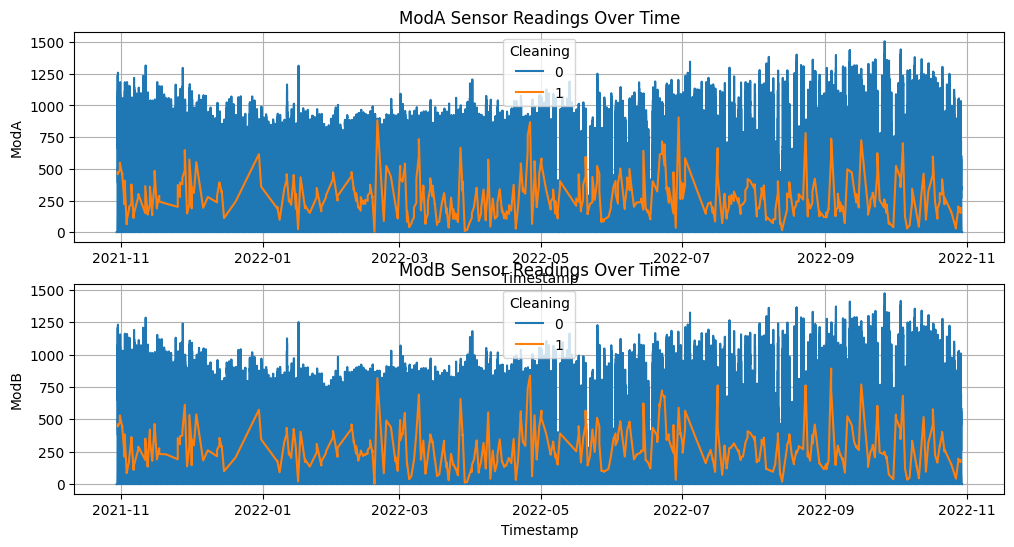

In [5]:

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
sns.lineplot(data=df, x=df.index, y='ModA', hue='Cleaning')
plt.title('ModA Sensor Readings Over Time')
plt.grid()

plt.subplot(2, 1, 2)
sns.lineplot(data=df, x=df.index, y='ModB', hue='Cleaning')
plt.title('ModB Sensor Readings Over Time')
plt.grid()
plt.show()

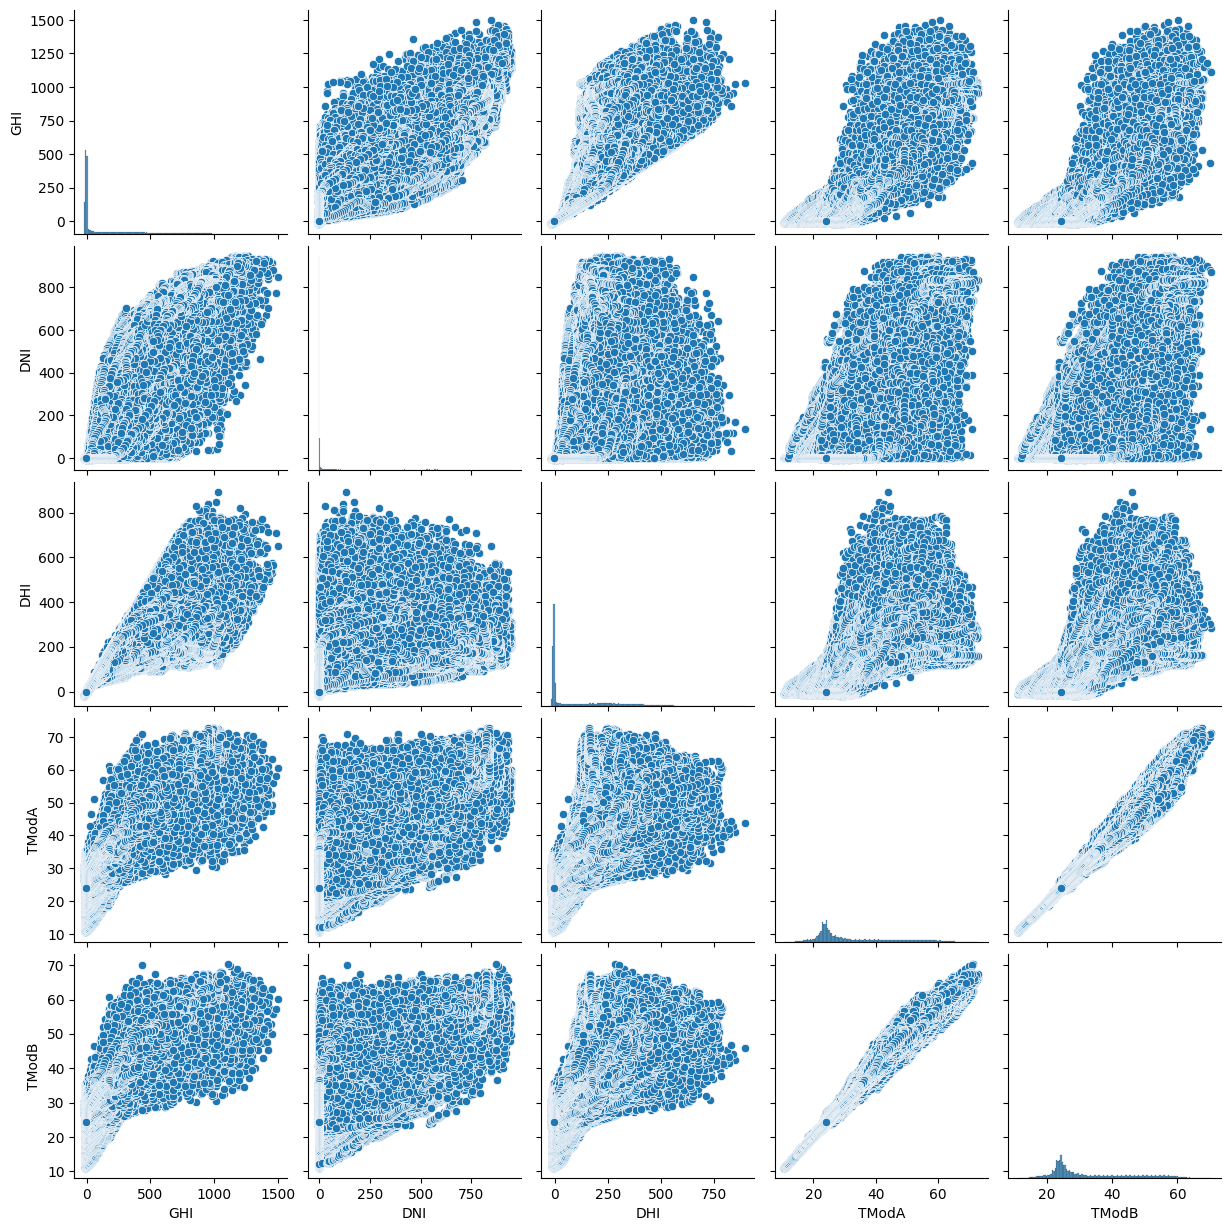

In [6]:
sns.pairplot(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']])
plt.show()

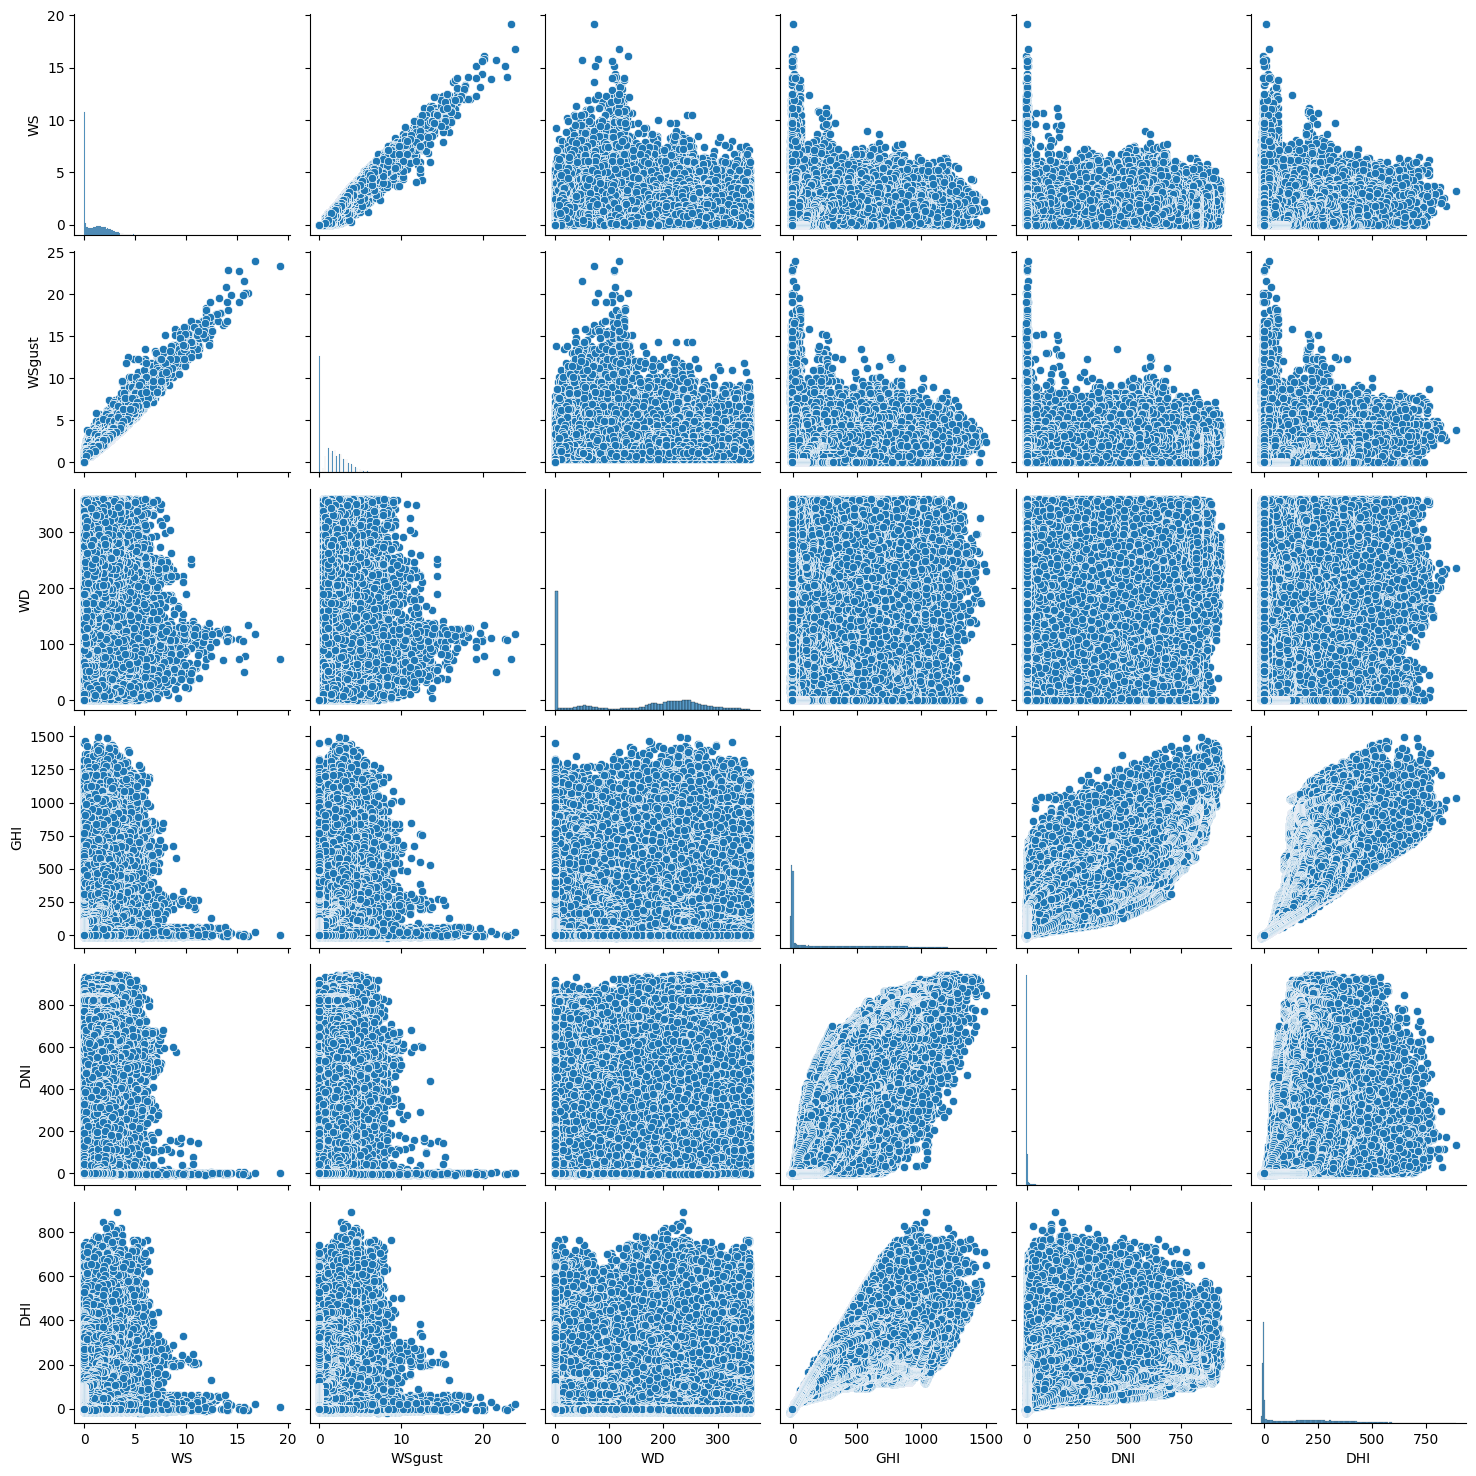

In [7]:
sns.pairplot(df[['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']])
plt.show()

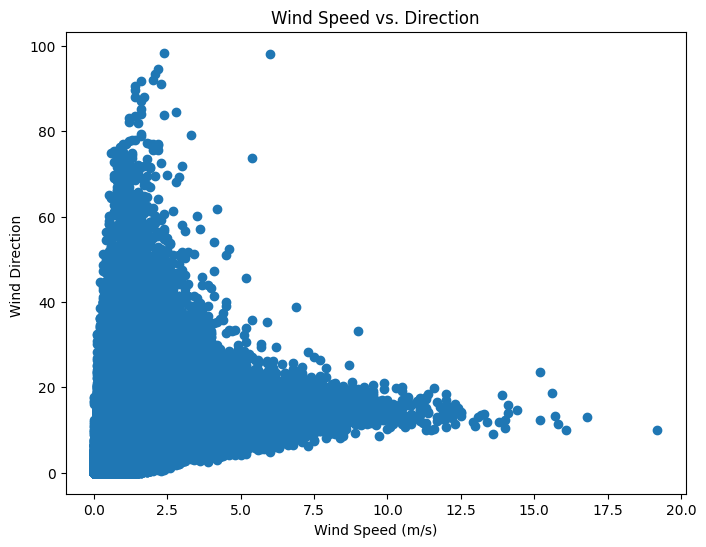

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df['WS'], df['WDstdev'])
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Wind Direction ')
plt.title('Wind Speed vs. Direction')
plt.show()

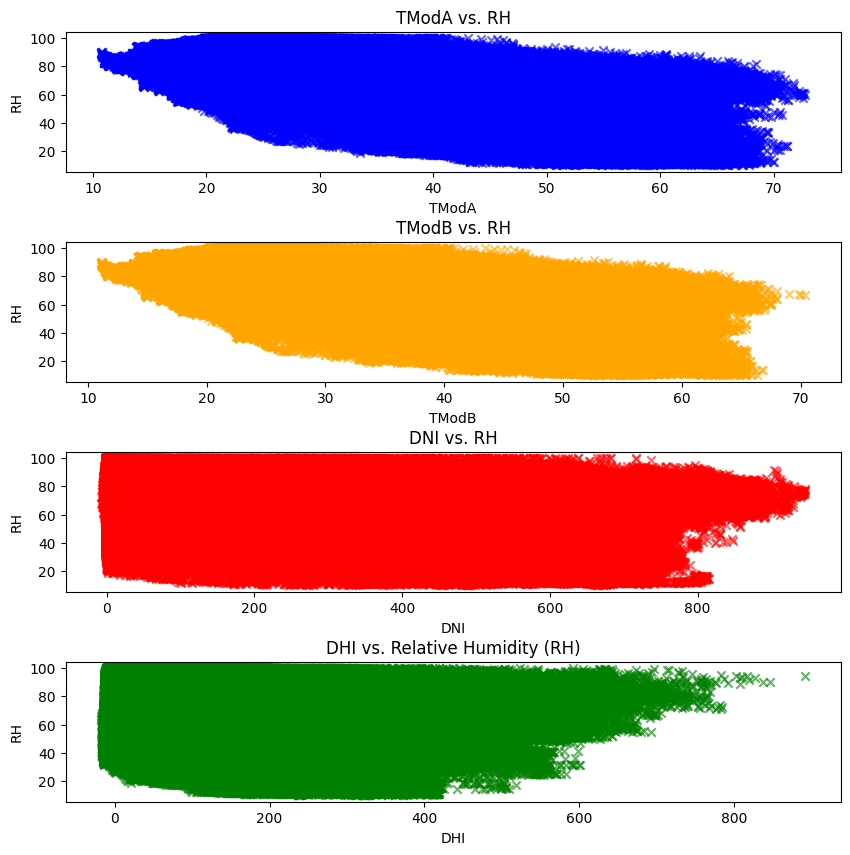

In [9]:
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

axs[0].scatter(df['TModA'], df['RH'], color='blue', marker='x', alpha=0.6)
axs[0].set_title('TModA vs. RH')
axs[0].set_xlabel('TModA')
axs[0].set_ylabel('RH')


axs[1].scatter(df['TModB'], df['RH'], color='orange', marker='x', alpha=0.6)
axs[1].set_title('TModB vs. RH')
axs[1].set_xlabel('TModB')
axs[1].set_ylabel('RH')

axs[2].scatter(df['DNI'], df['RH'], color='red', marker='x', alpha=0.6)
axs[2].set_title('DNI vs. RH')
axs[2].set_xlabel('DNI')
axs[2].set_ylabel('RH')

axs[3].scatter(df['DHI'], df['RH'], color='green', marker='x', alpha=0.6)
axs[3].set_title('DHI vs. Relative Humidity (RH)')
axs[3].set_xlabel('DHI')
axs[3].set_ylabel('RH')
plt.subplots_adjust(hspace=0.5)
plt.show()

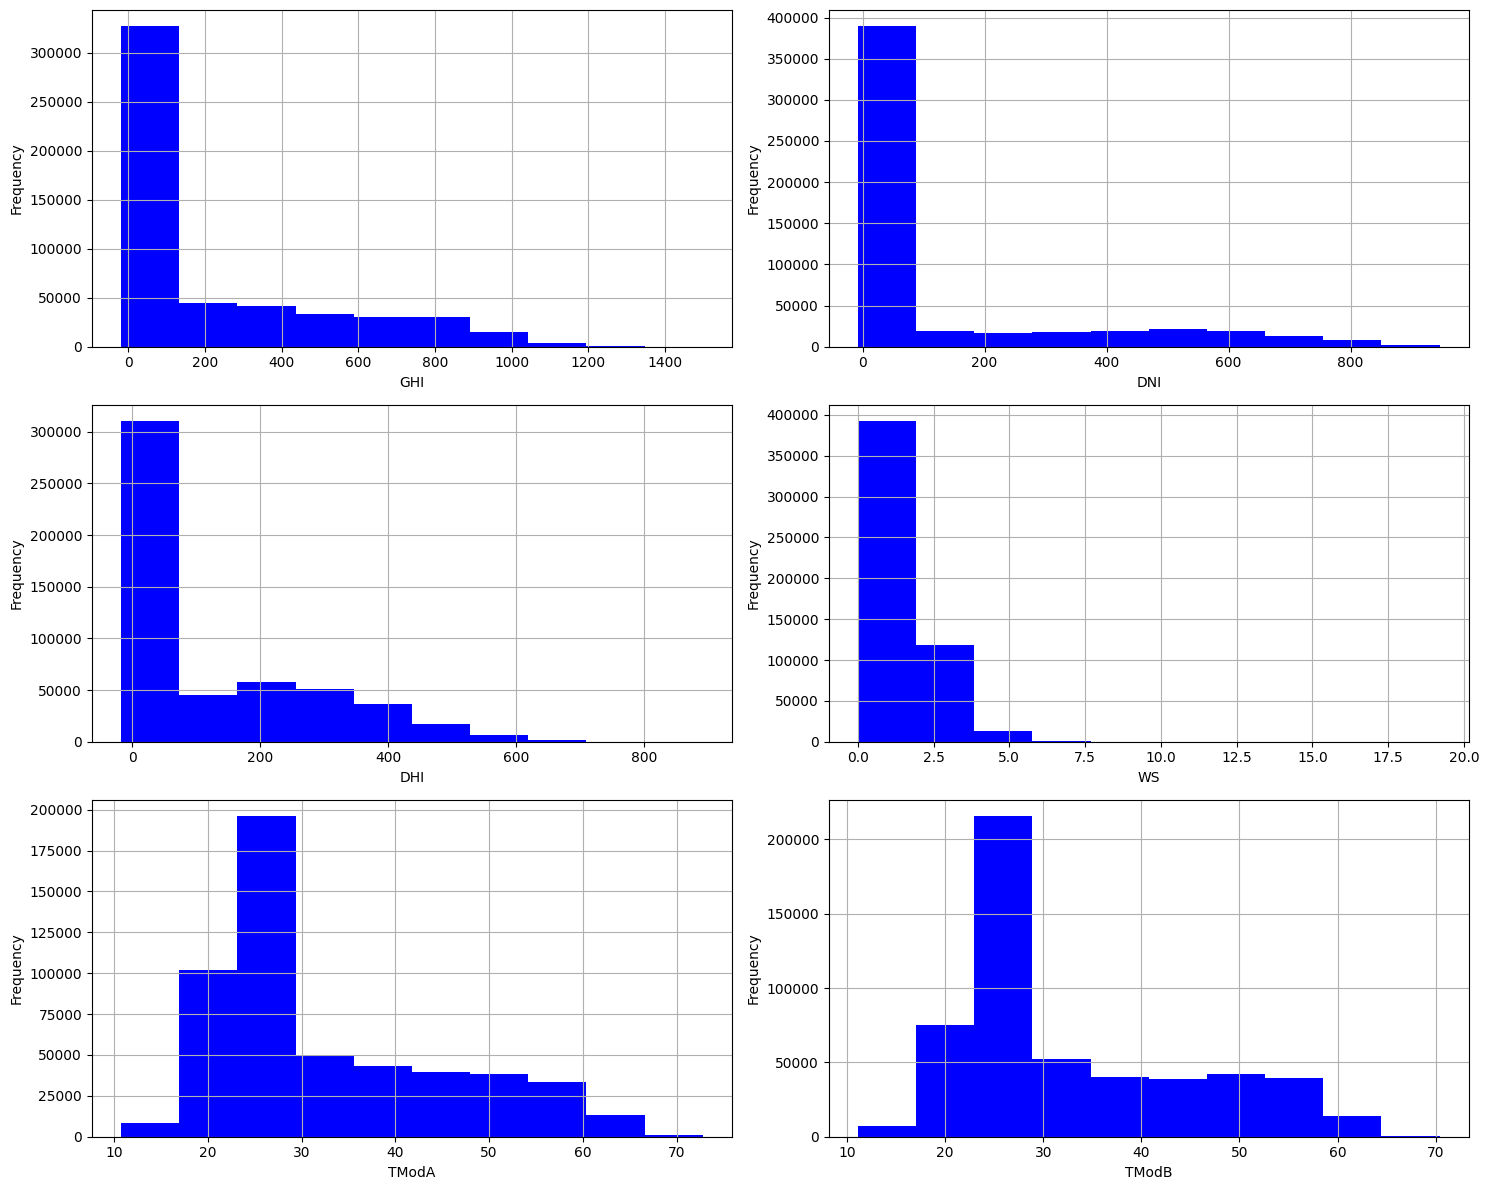

In [10]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB']
plt.figure(figsize=(15, 12))

for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)
    plt.hist(df[var], color='blue')

    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid()

plt.tight_layout()
plt.show()

In [11]:
variables = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB']
new_df = pd.DataFrame(index=df.index)

for var in variables:
    mean = df[var].mean()
    std = df[var].std()
    new_df[f'Z_{var}'] = (df[var] - mean) / std
    new_df[f'Outlier_{var}'] = np.where(np.abs(new_df[f'Z_{var}']) > 3, True, False)  


result_df = pd.concat([df[variables], new_df], axis=1)


print(result_df[[*variables, *[f'Z_{var}' for var in variables], *[f'Outlier_{var}' for var in variables]]])

                     GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
Timestamp                                                                  
2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...   ...   ...   ...    ...  ...     ...   
2022-10-29 23:56:00 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
2022-10-29 23:57:00 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
2022-10-29 23:58:00 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
2022-10-29 23:59:00 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
2022-10-30 00:00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0     0.0   

           

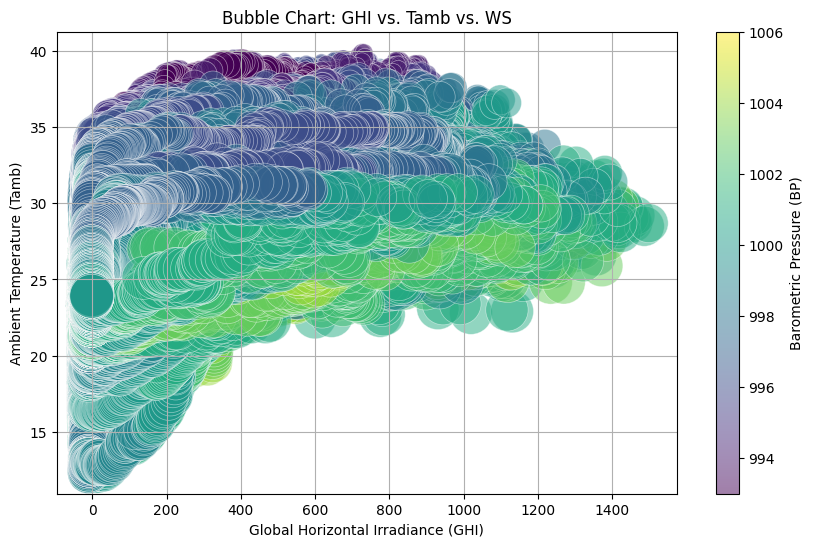

In [12]:
x = df['GHI']  
y = df['Tamb']  
size = df['RH'] * 10  
colors = df['BP']  


plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, s=size, c=colors, alpha=0.5, cmap='viridis', edgecolors="w", linewidth=0.5)


plt.title('Bubble Chart: GHI vs. Tamb vs. WS')
plt.xlabel('Global Horizontal Irradiance (GHI)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.colorbar(scatter, label='Barometric Pressure (BP)')
plt.grid()


plt.show()

In [13]:
df= df.drop('Comments', axis=1)
columns_to_replace = ['GHI', 'DNI', 'DHI']

for i in columns_to_replace:
    mean_value = df[i].mean()  
    df[i] = df[i].where(df[i] >= 0, mean_value)
print(df.columns)

Index(['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust',
       'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA',
       'TModB', 'Month', 'Hour'],
      dtype='object')
